PyTorch workflow
https://www.learnpytorch.io 

In [20]:
import torch, torchinfo, torchmetrics
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from torch import nn

In [21]:
import torch.nn         #for neural network
torch.__version__

'2.3.0'

In [22]:
#from torch import nn

In [23]:
#create known parameters
weight = 0.7
bias = 0.3

In [24]:
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)       #adds the extra dim at index 1 
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [25]:
len(X),len(y)

(50, 50)

Training and test set

In [26]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

Building a function to visualize the data

In [27]:
def plot_predictions(train_data= X_train, train_labels = y_train, test_data=X_test, test_lables =y_test, predictions = None ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels,c='b',s=4,label="Training data")
    plt.scatter(test_data,test_lables,c='g',s=4,label="Test data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4, label = "Predictions")
    
    plt.legend(prop={"size":8})

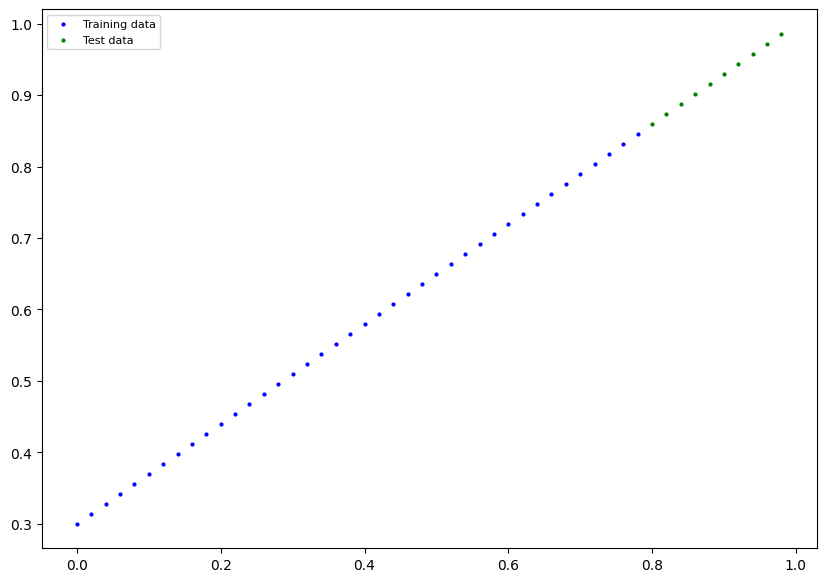

In [28]:
plot_predictions()      #call the function

Building a model (linear regression)

In [32]:
class LinearRegression(nn.Module):                      #creating subclass (child class) which inherits almost everything from the parent class nn.Module
    def __init__(self):
        super().__init__()                              #allows the function to use methods from the parent class
        self.weights = nn.Parameter(torch.rand(1,       #creates a 1dim random value (basically just a single number)
                                               requires_grad=True,      #pytorch will track the gradients of this specific parameter for use with torch.autograd and grad descent (this is usually on by default)
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        #forward method to defind the computations in the model
        def forward(self,x:torch.tensor)->torch.tensor:     # x is the input data (which is a type of torch.tensor) this method returns a "torch.tensor"
            return self.weights * x + self.bias             #this is the linear regression